In [36]:
# Ertrag pro Quadratmeter pro Gemeinde laden

import pandas as pd
df_ertrag = pd.read_csv('Data/ertrag_pro_quadratmeter_pro_gemeinde.csv')

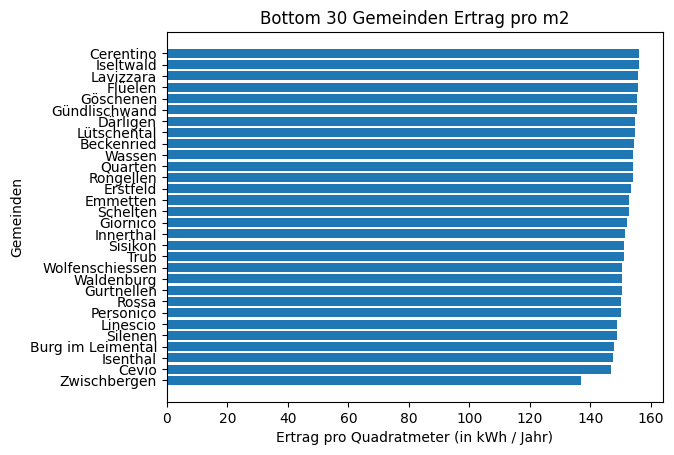

In [37]:
# Visualisierung der 30 Gemeinden mit den schlechtesten Ertrag pro m2
import matplotlib.pyplot as plt

bottom30 = df_ertrag.nsmallest(30, 'Ertrag_pro_Quadratmeter')

# Balkendiagramm erstellen mit matplotlib
plt.barh(bottom30['GGDENAME'], bottom30['Ertrag_pro_Quadratmeter'])
plt.xlabel('Ertrag pro Quadratmeter (in kWh / Jahr)')
plt.ylabel('Gemeinden')
plt.title('Bottom 30 Gemeinden Ertrag pro m2')
plt.show()


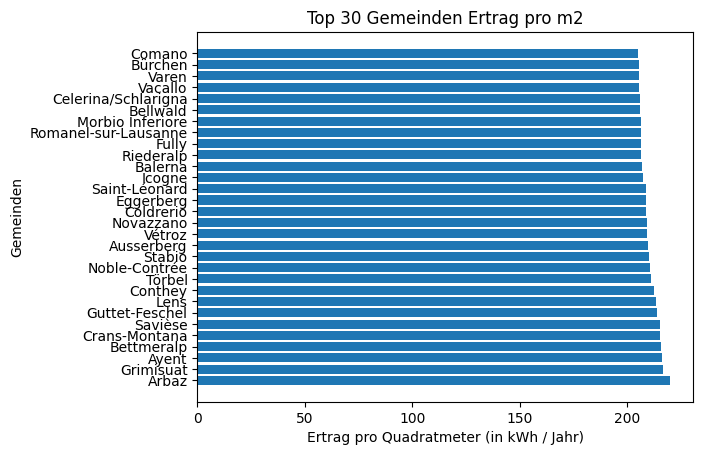

In [38]:
# Top 30 Gemeinden visualisieren 

top30 = df_ertrag.nlargest(30, 'Ertrag_pro_Quadratmeter')

# Balkendiagramm erstellen
plt.barh(top30['GGDENAME'], top30['Ertrag_pro_Quadratmeter'])
plt.xlabel('Ertrag pro Quadratmeter (in kWh / Jahr)')
plt.ylabel('Gemeinden')
plt.title('Top 30 Gemeinden Ertrag pro m2')
plt.show()


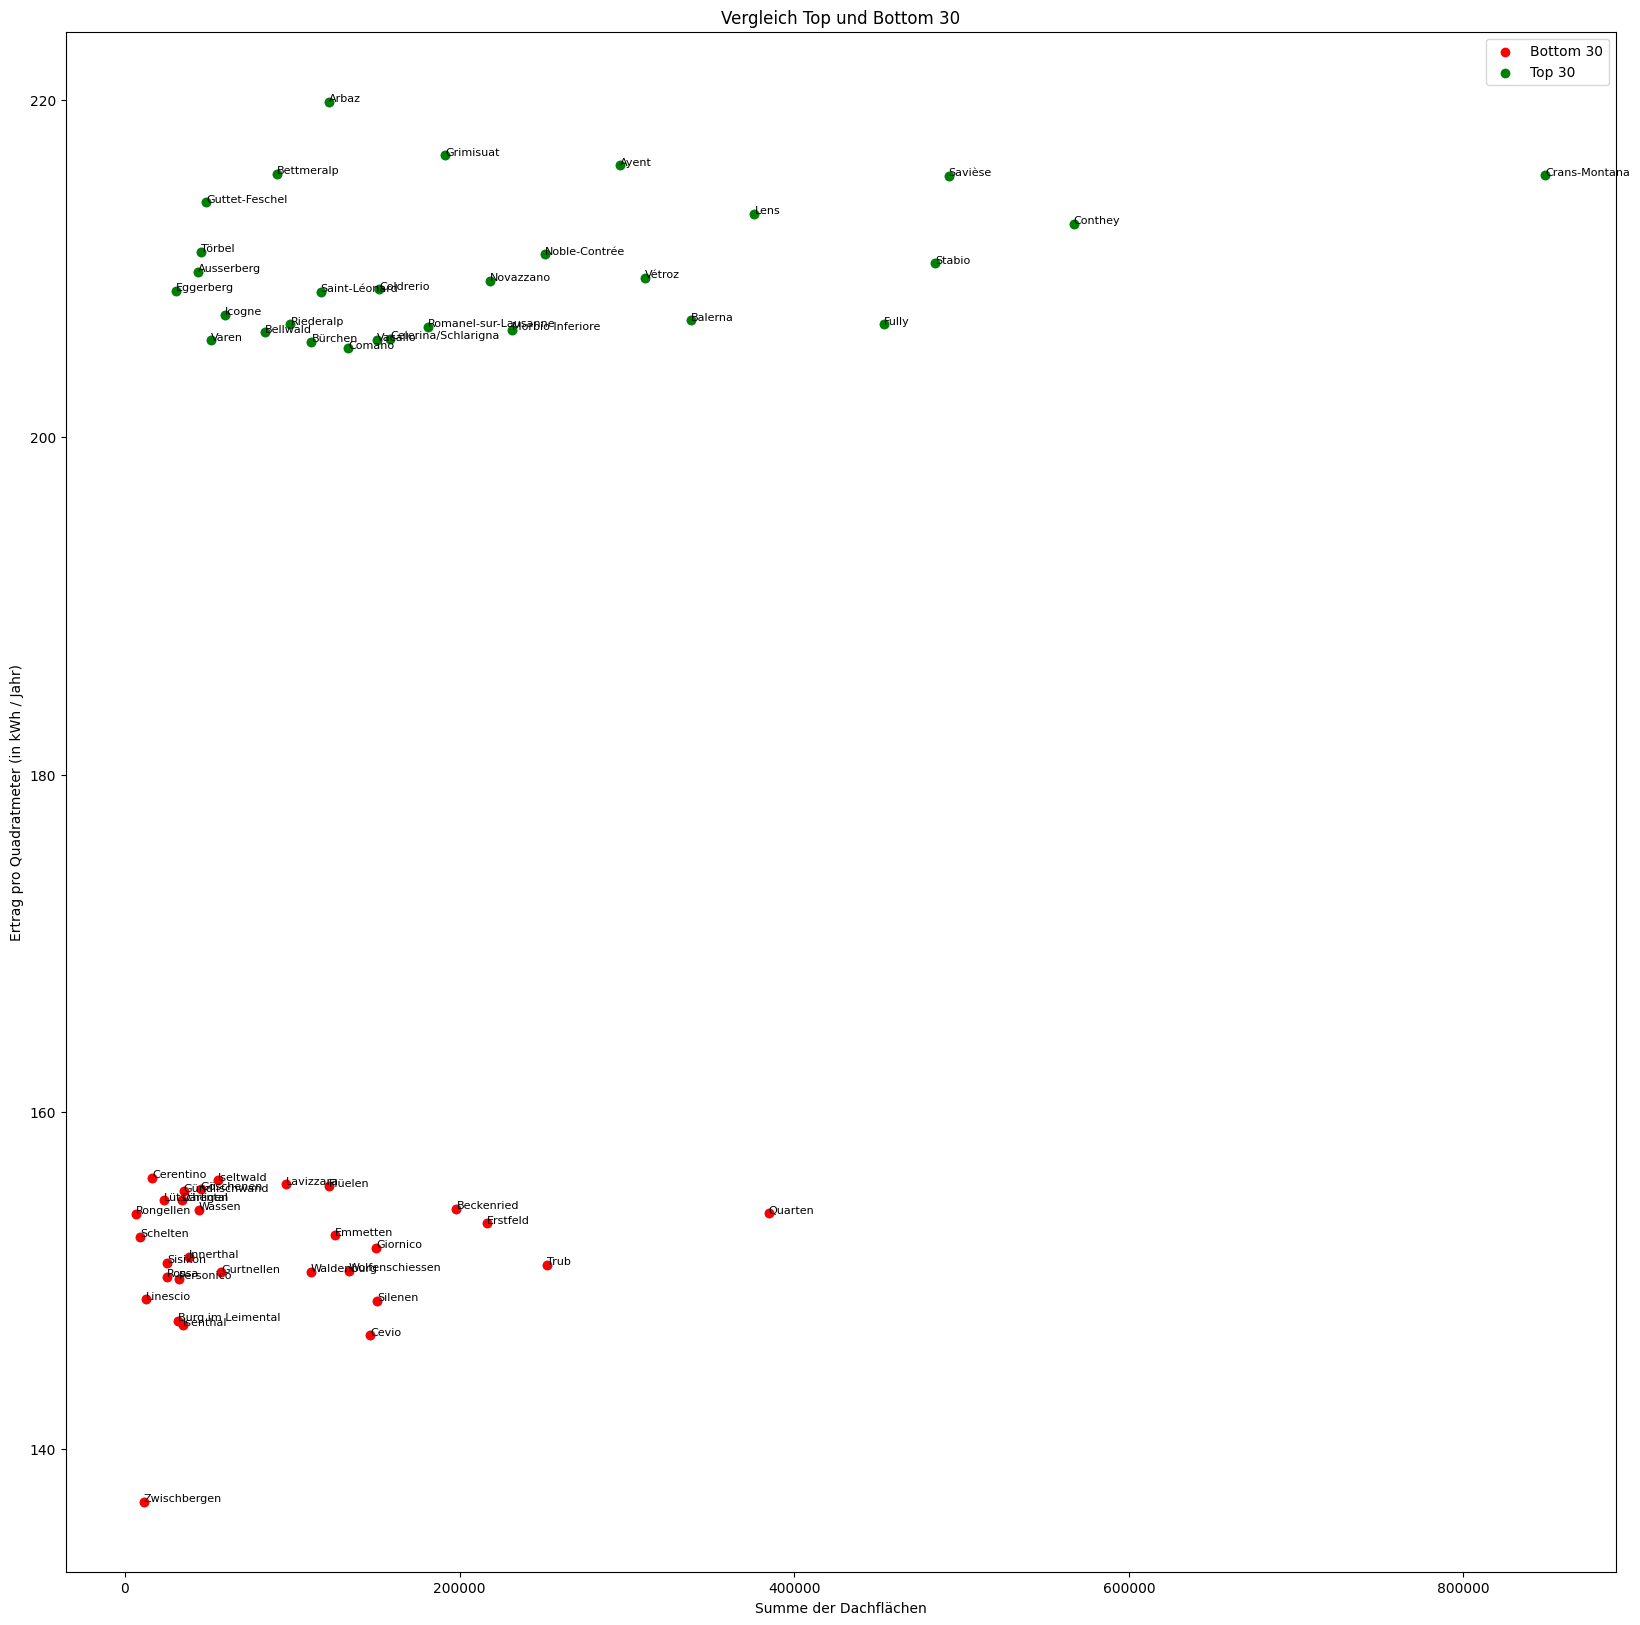

In [48]:
# Visualisierung der Bottom und Top 30 zum Vergleich, Top in grün, Bottom in rot

import pandas as pd
import matplotlib.pyplot as plt

df_scatter = pd.concat([top30, bottom30])

plt.figure(figsize=(20, 20))


plt.scatter(df_scatter['Summe_Flaeche'], df_scatter['Ertrag_pro_Quadratmeter'], alpha=0.7)

for i, row in df_scatter.iterrows():
    plt.text(row['Summe_Flaeche'], row['Ertrag_pro_Quadratmeter'], row['GGDENAME'], fontsize=8)

# Punkte für die schlechtesten 30 Gemeinden rot einfärben
plt.scatter(bottom30['Summe_Flaeche'], bottom30['Ertrag_pro_Quadratmeter'], color='red', label='Bottom 30')

# Punkte für die besten 30 Gemeinden grün einfärben
plt.scatter(top30['Summe_Flaeche'], top30['Ertrag_pro_Quadratmeter'], color='green', label='Top 30')


plt.xlabel('Summe der Dachflächen')
plt.ylabel('Ertrag pro Quadratmeter (in kWh / Jahr)')
plt.title('Vergleich Top und Bottom 30')

plt.legend()

plt.show()



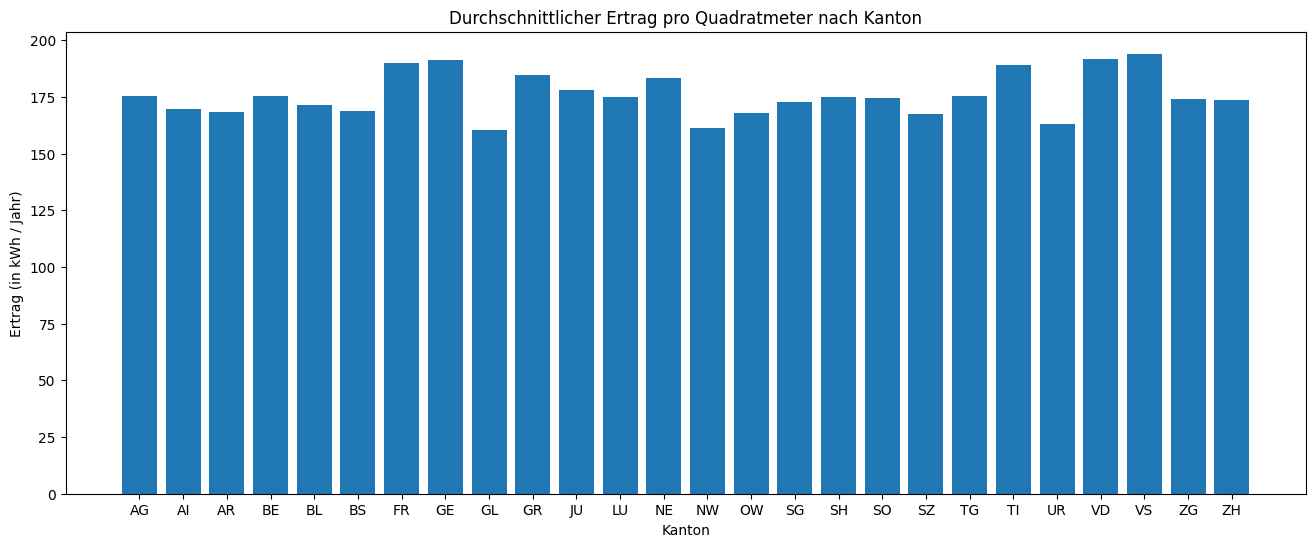

In [50]:
# Daten nach Kantonen gruppieren und den Durchschnitt der Erträge pro Quadratmeter berechnen

df_ertrag_kanton_ds = df_ertrag.groupby('GDEKT')['Ertrag_pro_Quadratmeter'].mean().reset_index()

plt.figure(figsize=(16, 6))

plt.bar(df_ertrag_kanton_ds['GDEKT'], df_ertrag_kanton_ds['Ertrag_pro_Quadratmeter'])

plt.xlabel('Kanton')
plt.ylabel('Ertrag (in kWh / Jahr)')
plt.title('Durchschnittlicher Ertrag pro Quadratmeter nach Kanton')
plt.show()



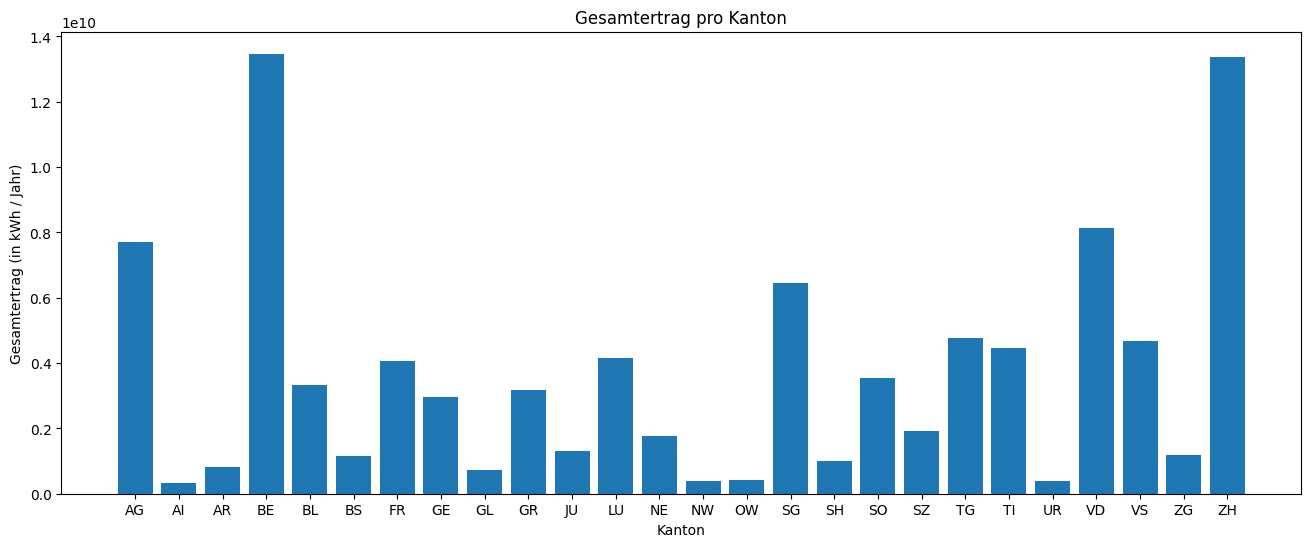

In [57]:
# Daten nach Kantonen gruppieren und die Summe der Erträge pro Quadratmeter berechnen

df_ertrag_gemeinde_sum = pd.read_csv('Data\summe_ertrag_pro_gemeinde.csv')

# Daten nach Kantonen gruppieren und die Summe der Erträge pro Quadratmeter berechnen
df_ertrag_kanton_sum = df_ertrag_gemeinde_sum.groupby('GDEKT')['Summe_Stromertrag'].sum().reset_index()

plt.figure(figsize=(16, 6))

plt.bar(df_ertrag_kanton_sum['GDEKT'], df_ertrag_kanton_sum['Summe_Stromertrag'])

plt.xlabel('Kanton')
plt.ylabel('Gesamtertrag (in kWh / Jahr)')
plt.title('Gesamtertrag pro Kanton')

plt.show()
